#### An introduction to Linear Regression using Python

### Import Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Note: The data for this exercise was simulated by using the code below.

'''
# Set-up
n_samples = 20
np.random.seed(314)

def true_fun(X):
    return -np.sin(2.2 * np.pi * X)

# Generate data
x = np.sort(np.random.rand(n_samples))

y = true_fun(x) + np.random.randn(n_samples) * 0.1

pd.DataFrame({'x': x, 'y': y}).to_csv('../data/linreg_sample.csv', index=False)
'''

"\n# Set-up\nn_samples = 20\nnp.random.seed(314)\n\ndef true_fun(X):\n    return -np.sin(2.2 * np.pi * X)\n\n# Generate data\nx = np.sort(np.random.rand(n_samples))\n\ny = true_fun(x) + np.random.randn(n_samples) * 0.1\n\npd.DataFrame({'x': x, 'y': y}).to_csv('../data/linreg_sample.csv', index=False)\n"

### Read Data

In [3]:
data_url = 'https://bitbucket.org/vishal_derive/vcu-data-mining/raw/5b4bf03e5a3894c25ee67075f16850853f38ca3e/data/linreg_sample.csv'

df = pd.read_csv(data_url)

# Note: Alternatively, run the line below if the CSV is stored in the data folder
# df = pd.read_csv(r'..\data\linreg_sample.csv')

df.head()

,x,y
0,0.069914,-0.346400
1,0.122291,-0.636178
2,0.260480,-1.160382
3,0.260757,-1.036982
4,0.261531,-1.048191


Plot the data.

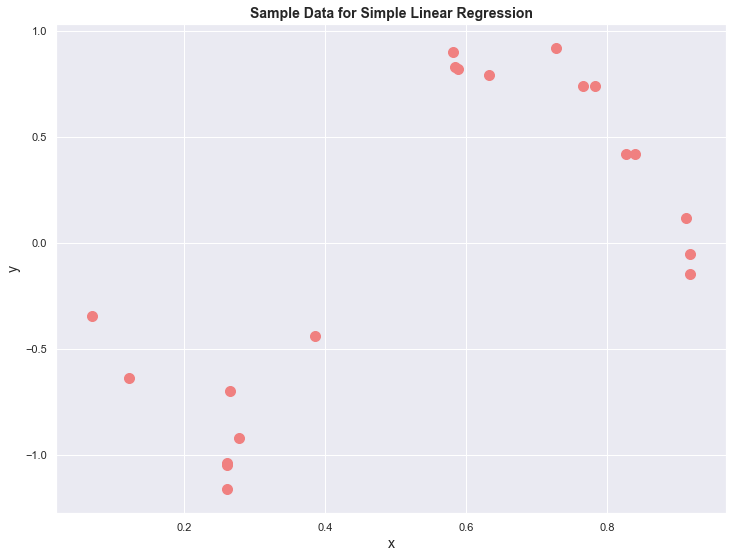

In [4]:
sns.set(style='darkgrid')

plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Sample Data for Simple Linear Regression', fontsize=14, weight='semibold')

plt.show();

### Correlation coefficient

In [5]:
# Calculate the correlation coefficient using numpy

np.corrcoef(df.x, df.y)

array([[1.        , 0.67656828],
       [0.67656828, 1.        ]])

In [6]:
corr_coef = np.corrcoef(df.x, df.y)[1][0]

print(corr_coef)

0.6765682759221001


Is this the same as the sumproduct of the standarized `x` and `y`?

In [7]:
# Standardize x and y using numpy
x_std = (df.x - np.mean(df.x)) / np.std(df.x)
y_std = (df.y - np.mean(df.y)) / np.std(df.y)

# Take the sum product of standardized x and y, and divide by sample size
print (np.dot(x_std, y_std) / df.shape[0])

0.6765682759221001


<img src="../misc/corr_coeff.png" align=left width=300>

## Simple Linear Regression

Step 1: Create linear regression object.

In [8]:
linreg = linear_model.LinearRegression()

Step 2: Fit the model.

In [9]:
linreg.fit(df.x[:, np.newaxis], df.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept and regression coefficients.

In [10]:
print(linreg.intercept_, linreg.coef_[0])

-0.9651642167052663 1.775572344559645


In [11]:
intercept = linreg.intercept_
coeff = linreg.coef_[0]

Step 3: Make predictions.

In [12]:
linreg.predict(df.x[:, np.newaxis])

array([-0.8410274 , -0.74802704, -0.50266238, -0.50217209, -0.50079676,
       -0.49455276, -0.47123664, -0.27978346,  0.06685514,  0.07313017,
        0.07983453,  0.15896776,  0.3273663 ,  0.39559186,  0.4254736 ,
        0.50386446,  0.52646081,  0.65373766,  0.66281116,  0.66481308])

In [13]:
y_hat = linreg.predict(df.x[:, np.newaxis])

Plot the data with the regression line.

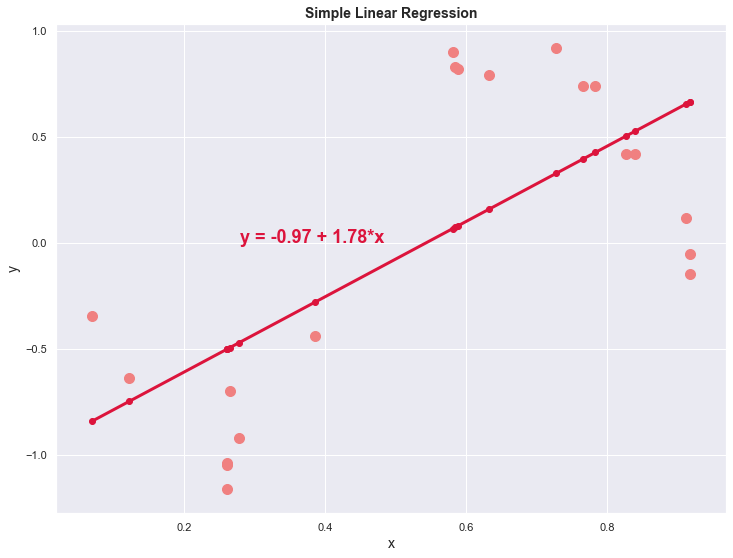

In [14]:
sns.set(style='darkgrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.scatter(df.x, y_hat, color='crimson')
plt.plot(df.x, linreg.predict(df.x[:, np.newaxis]), color='crimson', linewidth=3)

plt.text(.28, 0, f'y = {intercept:.2f} + {coeff:.2f}*x', 
         fontsize=18, color='crimson', weight='semibold')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Simple Linear Regression', fontsize=14, weight='semibold')
plt.show()

### Regression Slope and Intercept

Calculate the regression slope and intercept using the correlation coefficient, the averages and standard deviations for `x` and `y`.

In [15]:
reg_slope = corr_coef * np.std(df.y) / np.std(df.x)

print(reg_slope)

1.775572344559645


In [16]:
reg_intercept = df.y.mean() - reg_slope * df.x.mean()

print(reg_intercept)

-0.9651642167052663


<img src='../misc/reg_slope_and_intercept.png' align=left width=700>

## Multiple Linear Regression

#### Exercise: Read the wine quality data and perform linear regression using all numeric features to predict the wine quality.

Step 1: Read data into a dataframe.

In [17]:
df_wine = pd.read_csv(r'../data/winequality.csv', index_col=0)

df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


Step 2: Isolate numeric columns.

In [18]:
num_cols = df_wine.columns[df_wine.dtypes == 'float64']

print(f'Numeric features: \n {num_cols}')

Numeric features: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


Step 3: Fit a regression model.

In [19]:
linreg.fit(df_wine[num_cols], df_wine.quality)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step 4: View intercept and coefficient values.

In [20]:
linreg.intercept_, linreg.coef_

(55.76274961173735,
 array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
        -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
         4.39296072e-01,  7.68251760e-01,  2.67030009e-01]))

Combine coefficients with the column names.

In [21]:
list(zip(num_cols, linreg.coef_))

[('fixed acidity', 0.06768391557153516),
 ('volatile acidity', -1.3278922111895095),
 ('citric acid', -0.10965664815793238),
 ('residual sugar', 0.04355875074070315),
 ('chlorides', -0.48371353068604117),
 ('free sulfur dioxide', 0.005969888299277128),
 ('total sulfur dioxide', -0.0024812984083657993),
 ('density', -54.96694221961977),
 ('pH', 0.43929607193865716),
 ('sulphates', 0.7682517601447575),
 ('alcohol', 0.2670300088387691)]

Create a dataframe and store the results (parameters and coefficients) into it.

In [22]:
df_coeff = pd.DataFrame(columns=['feature', 'coeff'])

df_coeff['feature'] = num_cols
df_coeff['coeff'] = linreg.coef_

df_coeff

,feature,coeff
0,fixed acidity,0.067684
1,volatile acidity,-1.327892
2,citric acid,-0.109657
3,residual sugar,0.043559
4,chlorides,-0.483714
5,free sulfur dioxide,0.005970
6,total sulfur dioxide,-0.002481
7,density,-54.966942
8,pH,0.439296
9,sulphates,0.768252


_Note: All of these features have different means and variances. In order to compare the coefficients across features, we must either standardize the data first or calculate standardized coefficients._

Step 5: Make predictions and store them in the same dataframe (as a new column).

In [23]:
df_wine['preds'] = linreg.predict(df_wine[num_cols])

df_wine[['quality', 'preds']].head(20)

,quality,preds
0,6,5.556809
1,6,5.281311
2,6,5.879632
3,6,5.697990
4,6,5.697990
5,6,5.879632
6,6,5.499621
7,6,5.556809
8,6,5.281311
9,6,5.934254


Step 6: Plot the actuals (wine quality) versus residuals.

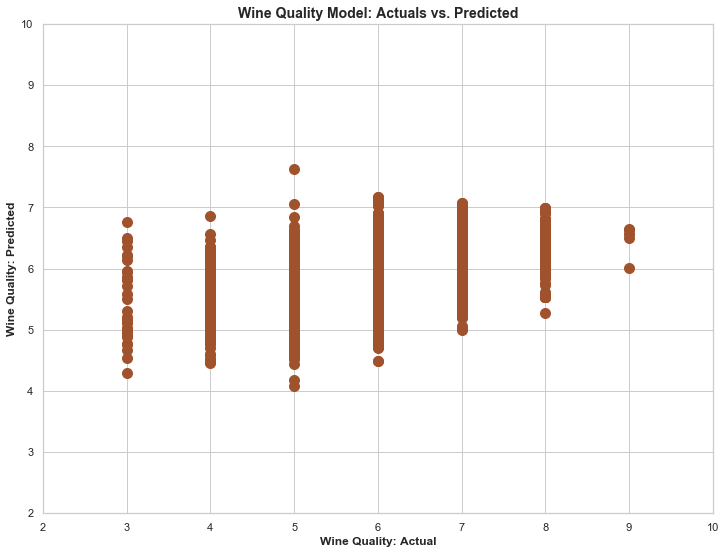

In [24]:
sns.set(style='whitegrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df_wine.quality, df_wine.preds, color='sienna', s=100)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.xlim([2, 10])
plt.ylim([2, 10])

plt.xlabel('Wine Quality: Actual', fontsize=12, weight='semibold')
plt.ylabel('Wine Quality: Predicted', fontsize=12, weight='semibold')
plt.title('Wine Quality Model: Actuals vs. Predicted', fontsize=14, weight='semibold')
plt.show();

Coefficient of determination: R squared

In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(df_wine.quality, df_wine.preds)

r2

0.29213688504020474

Adjusted R squared

In [26]:
n, p = df_wine.shape[0], df_wine.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2

0.2906080230208531

Mean Squared Error (MSE)

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_wine.quality, df_wine.preds)

0.5397154672783371